### 데이터 수집
- 대중교통통계자료 ( https://www.t-money.co.kr/ncs/pct/ugd/ReadTrcrStstList.dev )
- 2022년 6월 자료

In [1]:
import seaborn as sns

sns.set(font_scale=1) # seaborn 기초 세팅

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [3]:
import warnings
warnings.simplefilter("ignore")

### 데이터 로드
- 파일내 특정 시트 호출하기

In [35]:
# sheet_name = 2
subway = pd.read_excel('../../data/dataset/2022년 06월  교통카드 통계자료.xls', sheet_name=2, usecols=[1,3,4,5,6,7], thousands=',')
subway.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1150754,1123193,194717,187155
1,1호선,시청,537067,543569,80671,78279
2,1호선,종각,834173,815704,131987,121717


In [36]:
subway.shape

(615, 6)

In [37]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     615 non-null    object
 1   지하철역    615 non-null    object
 2   유임승차    615 non-null    int64 
 3   유임하차    615 non-null    int64 
 4   무임승차    615 non-null    int64 
 5   무임하차    615 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 29.0+ KB


### EDA

#### 1) 유임승차 비율이 가장 높은 역
- 유임승차비율1 = 유임승차인원 / 무임승차인원

In [38]:
subway['유임승차비율1'] = round(subway['유임승차'] / subway['무임승차'], 1)
subway.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1
0,1호선,서울역,1150754,1123193,194717,187155,5.9
1,1호선,시청,537067,543569,80671,78279,6.7
2,1호선,종각,834173,815704,131987,121717,6.3


In [39]:
subway.sort_values('유임승차비율1', ascending=False)
# inf : 값을 0으로 나눔

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1
331,경의선,검암,2,0,0,0,inf
520,7호선,부평구청,1,0,0,0,inf
519,7호선,상동,1,0,0,0,inf
440,6호선,연신내,31,0,0,0,inf
474,6호선,신내,4,0,0,0,inf
...,...,...,...,...,...,...,...
7,1호선,제기동,218782,209109,263173,281985,0.8
296,중앙선,지평,952,1282,1216,1173,0.8
294,중앙선,원덕,5854,5749,6959,6739,0.8
208,경원선,소요산,32659,25998,62990,56806,0.5


- 0으로 나누어진 값들이 존재하면서 inf 값 발생

In [40]:
condition = (subway['유임승차비율1'] != np.inf) & (subway['유임승차비율1'] > 0) & (subway['유임승차'] > 10000)

#### 유임승차비율 순으로 정렬

In [41]:
subway.loc[condition, ['호선명', '지하철역', '유임승차비율1']].sort_values('유임승차비율1', ascending=False)

,호선명,지하철역,유임승차비율1
18,2호선,한양대,21.6
566,공항철도 1호선,홍대입구,17.9
48,2호선,홍대입구,17.7
120,경부선,서울역,15.8
568,공항철도 1호선,마곡나루(서울식물원),15.7
...,...,...,...
597,우이신설선,삼양사거리,1.1
295,중앙선,용문,0.9
9,1호선,동묘앞,0.8
7,1호선,제기동,0.8


#### 2) 유임승차 비율이 가장 높은 역
- 유임승차비율2= 유임승차인원 / (무임승차인원 + 유임승차인원) 

In [42]:
subway['유임승차비율2'] = round(subway['유임승차'] / (subway['무임승차'] + subway['유임승차']) * 100, 1)
subway.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
0,1호선,서울역,1150754,1123193,194717,187155,5.9,85.5
1,1호선,시청,537067,543569,80671,78279,6.7,86.9
2,1호선,종각,834173,815704,131987,121717,6.3,86.3


In [44]:
condition = (subway['유임승차비율2'] != np.inf) & (subway['유임승차비율2'] > 0) & (subway['유임승차'] > 10000)

In [45]:
subway.loc[condition, ['호선명', '지하철역', '유임승차비율2']].sort_values('유임승차비율2', ascending=False)

,호선명,지하철역,유임승차비율2
18,2호선,한양대,95.6
566,공항철도 1호선,홍대입구,94.7
48,2호선,홍대입구,94.7
568,공항철도 1호선,마곡나루(서울식물원),94.0
120,경부선,서울역,94.0
...,...,...,...
597,우이신설선,삼양사거리,51.9
295,중앙선,용문,47.0
9,1호선,동묘앞,45.5
7,1호선,제기동,45.4


#### 3) 유무임 승하차 인원이 가장 많은 역

In [46]:
subway.sort_values('유임승차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
31,2호선,강남,2055521,2039847,154473,136085,13.3,93.0


In [47]:
subway.sort_values('유임하차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
31,2호선,강남,2055521,2039847,154473,136085,13.3,93.0


In [48]:
subway.sort_values('무임승차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
3,1호선,종로3가,450317,404106,299617,278151,1.5,60.0


In [49]:
subway.sort_values('무임하차', ascending=False).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율1,유임승차비율2
7,1호선,제기동,218782,209109,263173,281985,0.8,45.4


### 시각화

#### 1) 유임승차 인원이 1,000,000 이상인 역 추출한 후 승하차비율 시각화
- 유임승차 > 1000000, '지하철역, '유임승차', '유임하차', '무임승차', '무임하차' 추출 한 후 subway2 저장

In [53]:
subway2 = subway.loc[subway['유임승차'] > 1000000, ['지하철역', '유임승차', '유임하차', '무임승차', '무임하차']]
subway2.head()

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1150754,1123193,194717,187155
25,잠실(송파구청),1862829,1830324,193944,183893
28,삼성(무역센터),1336734,1358393,112903,105588
29,선릉,1245231,1103735,201887,177819
30,역삼,1160459,1322033,147014,150062


#### 2 ) 인덱스 재생성

In [63]:
subway2.reset_index(inplace=True)

In [64]:
subway2.drop('index', axis=1, inplace=True)

#### 3) 차트작성 : pie 차트
- 데이터프레임을 차트 그리기 좋은 형태로 변경

In [77]:
chart_pivot = pd.pivot_table(subway2, index='지하철역', values=['유임승차', '유임하차', '무임승차', '무임하차']).T

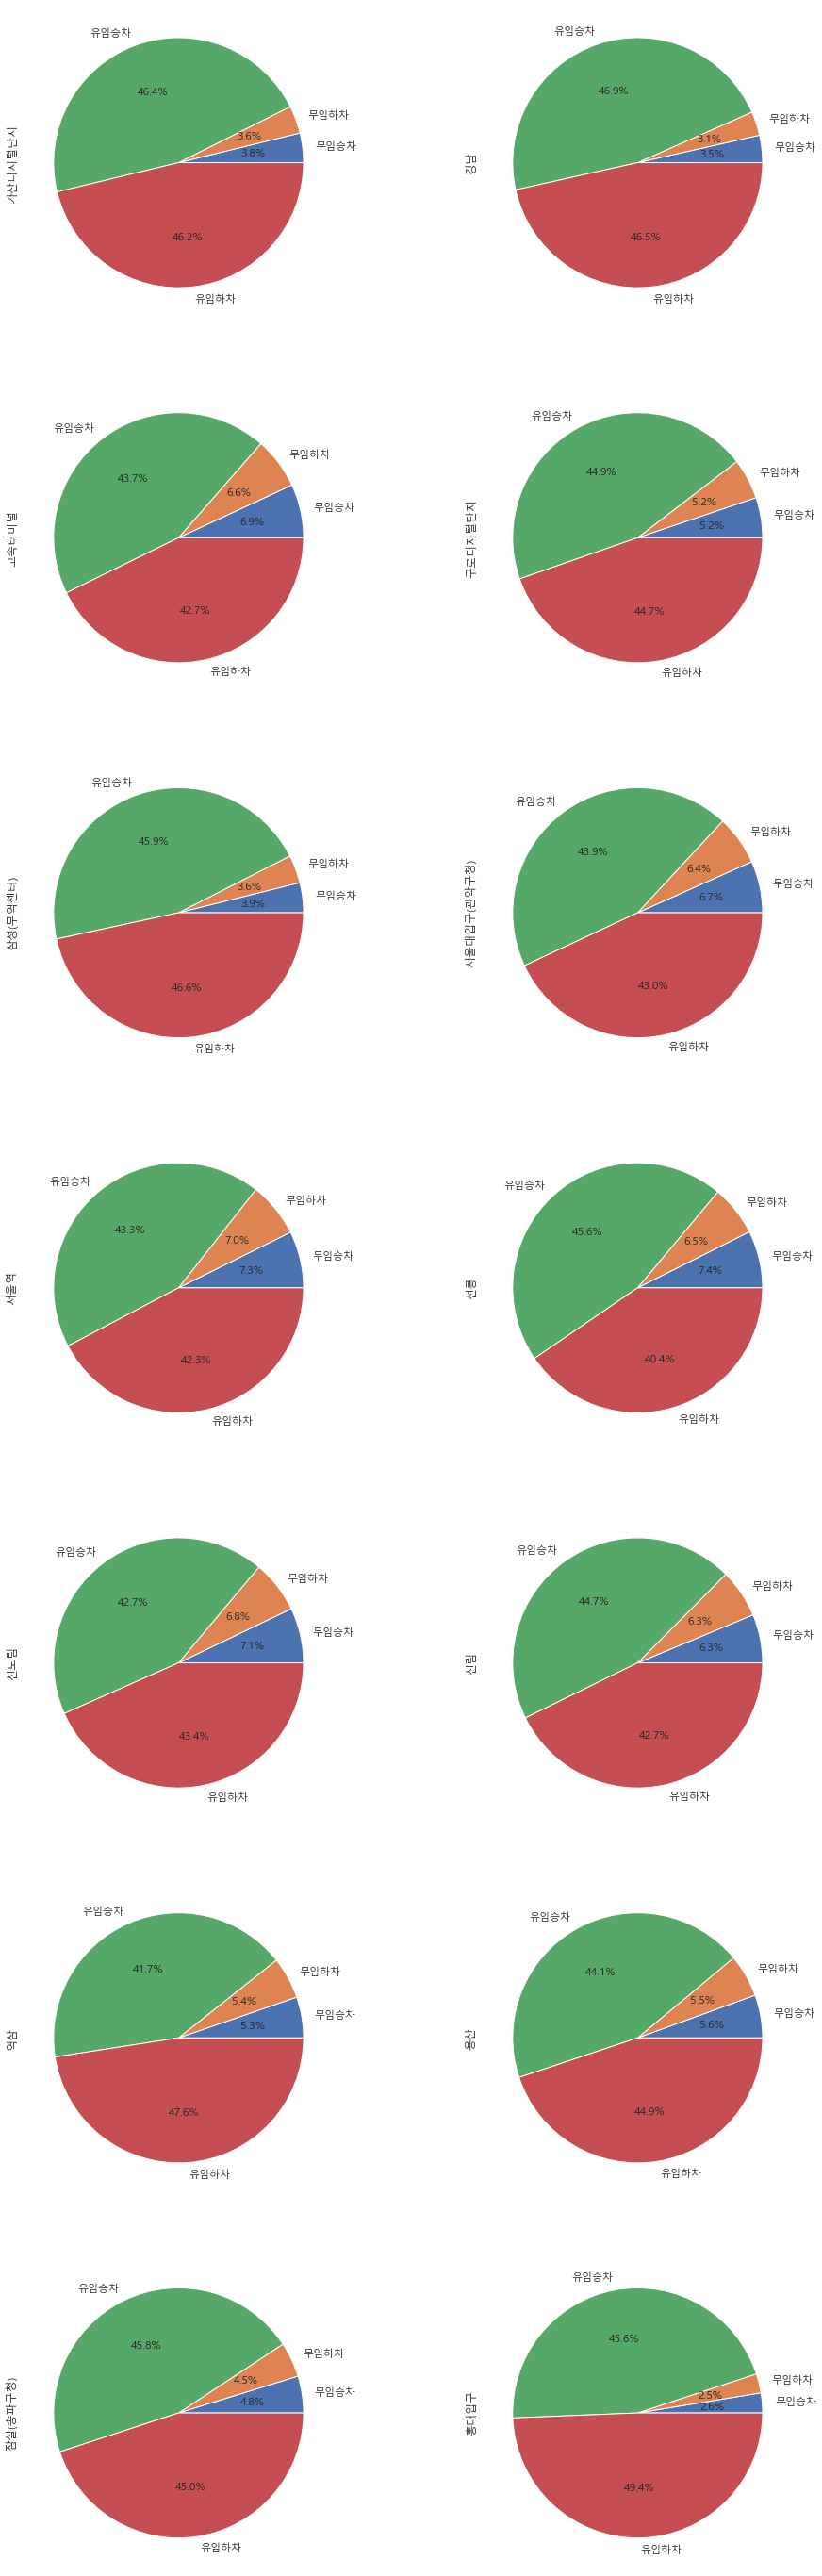

In [79]:
chart_pivot.plot.pie(subplots=True, layout=(7,2), figsize=(16,50), legend=False, autopct="%.1f%%");

#### 4) 차트를 파일로 저장

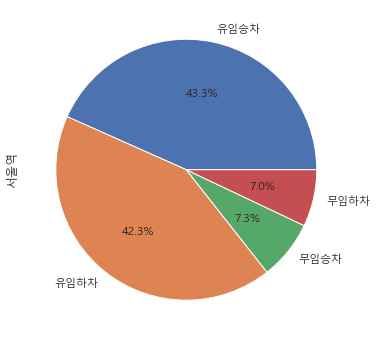

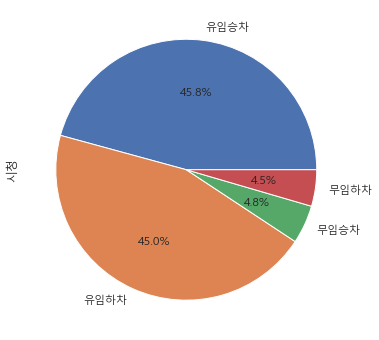

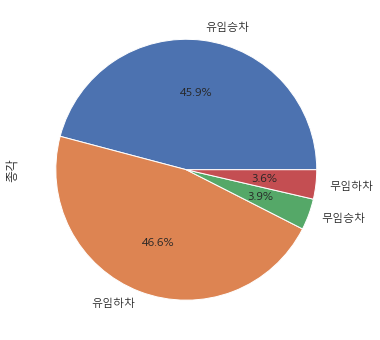

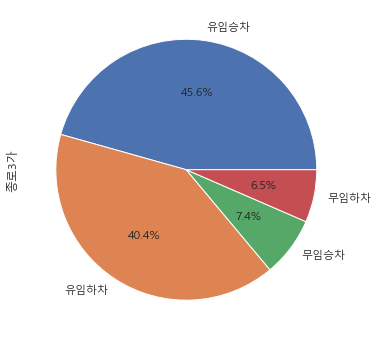

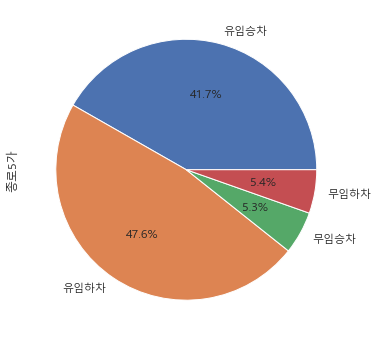

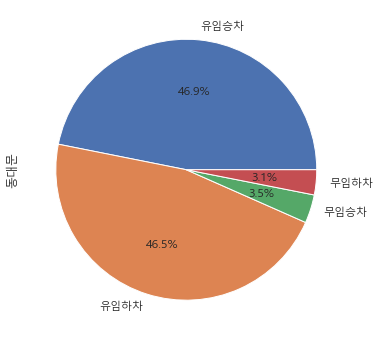

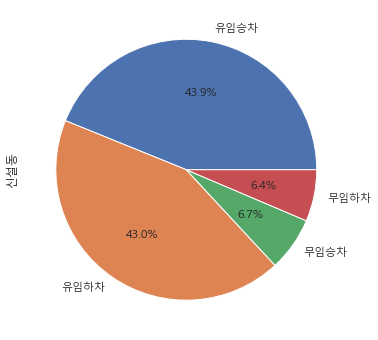

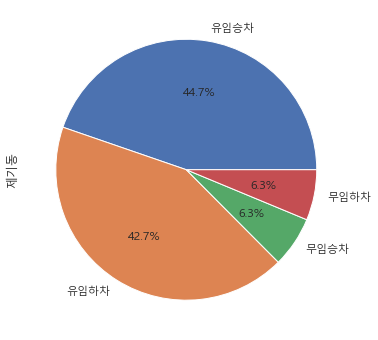

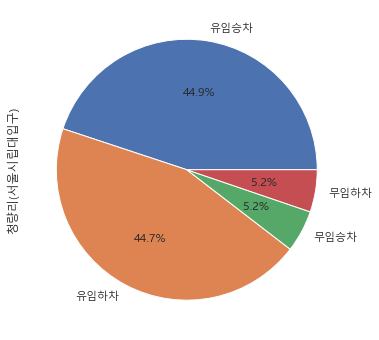

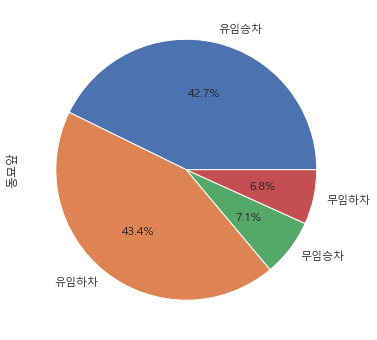

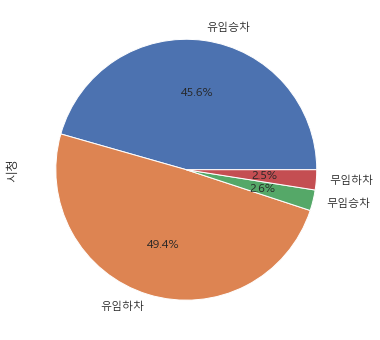

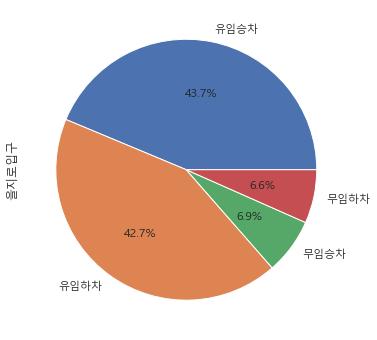

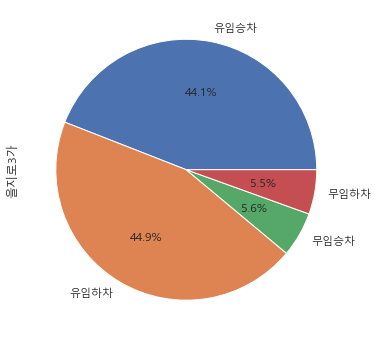

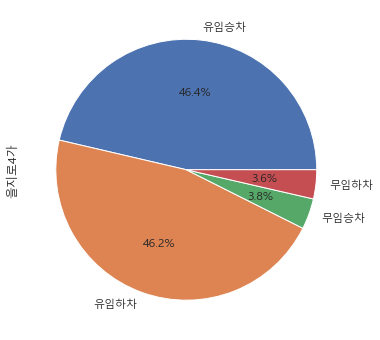

In [82]:
for idx in range(len(subway2)):
    subway2.loc[idx, ['유임승차', '유임하차', '무임승차', '무임하차']].plot.pie(autopct='%.1f%%', label=subway.loc[idx, '지하철역'], figsize=(6,6))
    plt.savefig(subway2.loc[idx, '지하철역'] + ".png")
    plt.show()